# Execute the code below

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/LucaSainteCroix/teaching-resources/main/exercises-data/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather = df_weather.iloc[:,[0,1,2, -4]]
df_weather

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,SUNHOUR
0,2019-01-01,9,4,5.1
1,2019-01-02,8,5,8.7
2,2019-01-03,6,0,8.7
3,2019-01-04,5,-1,5.1
4,2019-01-05,6,-1,8.7
...,...,...,...,...
360,2019-12-27,13,10,8.7
361,2019-12-28,11,5,6.9
362,2019-12-29,9,2,8.7
363,2019-12-30,12,4,8.7


# Univariate linear regression with Scikit-Learn

Scikit-Learn is the greatest Machine Learning library for Python.
Let's start with univariate Linear regression, to learn the syntax.

## Print a regplot with seaborn to show a linear regression between Sunhours (on the X-axis) and MAX temperature (on the Y-axis).

<Axes: xlabel='SUNHOUR', ylabel='MAX_TEMPERATURE_C'>

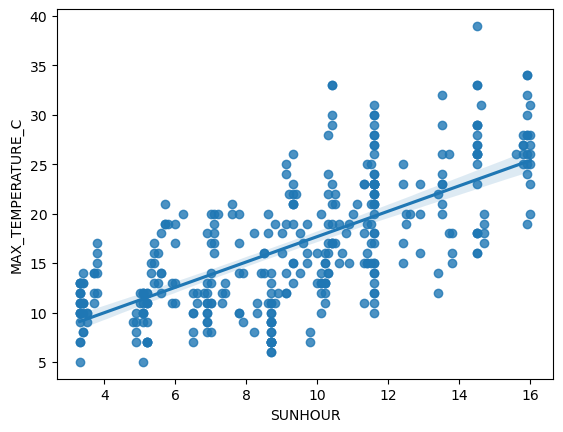

In [5]:
# Your code here :

sns.regplot(data=df_weather, x="SUNHOUR", y="MAX_TEMPERATURE_C")


## Train the model
You just have to read and execute the code below

In [6]:
# Scikit-Learn can find the coefficients of the linear regression
from sklearn.linear_model import LinearRegression

# First of all, you have to define 2 series :
# X-axis : the correlated column, here it is Sunhours
X = df_weather[['SUNHOUR']]

# Y-axis : the column to predict, so MAX Temperature here
y = df_weather['MAX_TEMPERATURE_C']

# Hey, why is "X" in uppercase and "y" in lowercase ? That's a good point, we'll see that next. Now, you just have to use this.

# To train a machine learning model (here, it will find the equation of the linear regression), you just have launch the ".fit" method.
modelLR = LinearRegression().fit(X, y)

## Explore the model

In [7]:
# Your model is trained, it has now some attributes.
# Coefficient, it's the "a" in your equation "aX + b"
print("coefficient :",modelLR.coef_)

# Interception, it's the "b" in your equation "aX + b"
print("intercept :", modelLR.intercept_)


coefficient : [1.28422116]
intercept : 4.8472953557195435


## Prediction for 1 value

In [8]:
# You can "predict" the Max Temperature from the Sunhours
# For example, let's try if Sunhours is 10 :

# Hand calculation :
print("By hand :", modelLR.coef_ * 10 + modelLR.intercept_ )

# With a Scikit-Learn function :
print("Scikit-Learn :  ", modelLR.predict([[10]])  )

By hand : [17.68950691]
Scikit-Learn :   [17.68950691]


c:\Users\benoi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Predictions for multiple values (a Serie)
Let's predict MAX temperature for the Sunhour column of your DataFrame.

Note : You'll have to precise your column with double "[", like that  : df[['your_column]]

*Why ? We'll see that in the next quest.*

In [9]:
# Find a way to store the result of the prediction in a new column 'predict" of the dataframe
modelLR.predict(df_weather[['SUNHOUR']])

array([11.39682325, 16.02001941, 16.02001941, 11.39682325, 16.02001941,
        9.08522517, 11.39682325,  9.08522517,  9.08522517, 16.02001941,
       11.39682325, 13.70842133,  9.08522517,  9.08522517, 16.02001941,
        9.21364728, 16.02001941, 16.02001941,  9.21364728, 11.52524536,
       16.02001941,  9.21364728, 11.52524536, 11.52524536,  9.21364728,
        9.3420694 , 15.37790883, 13.19473287, 11.0115569 , 13.19473287,
       11.13997902, 11.13997902, 17.43266268, 17.43266268, 11.13997902,
       11.13997902, 11.26840113, 13.32315498, 11.26840113, 13.32315498,
       15.50633095, 15.50633095, 17.81792903, 17.81792903, 17.94635114,
       17.94635114, 15.63475306, 17.94635114, 13.57999921, 11.52524536,
       17.68950691, 18.20319537, 18.20319537, 18.71688384, 15.76317518,
       18.84530595, 18.84530595, 18.97372807, 11.91051171, 17.81792903,
       17.81792903, 12.03893383, 15.89159729, 17.81792903, 12.03893383,
       16.02001941, 17.94635114, 12.42420017, 14.22210979, 17.94

## Visualisations
You can predict the Max temperature from any value of Sunhour. Your prediction is now stored in a column, you can now visualize it.

It's to you now :
Create on the same scatterplot chart :
- X-axis : Sunhours
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

<Axes: xlabel='SUNHOUR', ylabel='MAX_TEMPERATURE_C'>

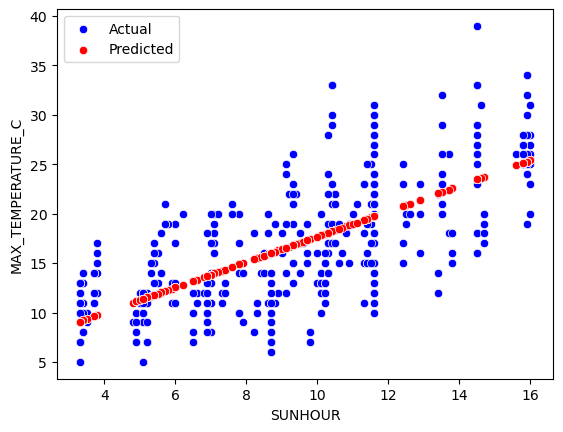

In [12]:
# Your code here :

df_weather['predict'] = modelLR.predict(df_weather[['SUNHOUR']])

sns.scatterplot(data=df_weather, x="SUNHOUR", y="MAX_TEMPERATURE_C", color='blue', label='Actual')
sns.scatterplot(data=df_weather, x="SUNHOUR", y="predict", color='red', label='Predicted')




Your prediction is stored in a DataFrame. **So, you can visualize your prediction without the "source" column.** Let's try it.
Create on the same scatterplot chart :
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

<Axes: xlabel='DATE', ylabel='MAX_TEMPERATURE_C'>

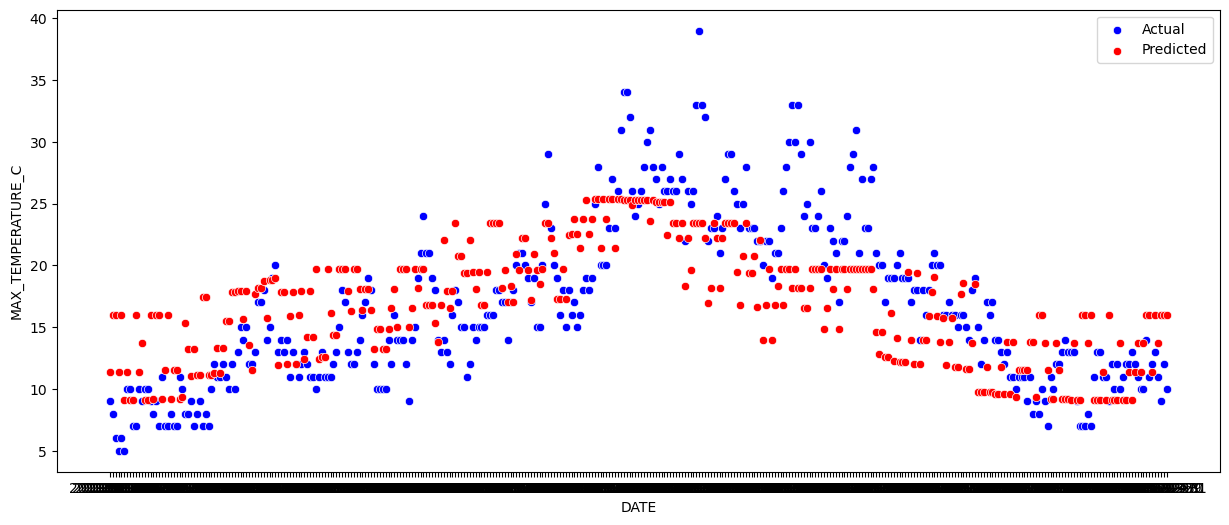

In [17]:
# Your code here :
df_weather['predict'] = modelLR.predict(df_weather[['SUNHOUR']])

plt.figure(figsize=(15, 6))

# Create the scatterplot
sns.scatterplot(data=df_weather, x="DATE", y="MAX_TEMPERATURE_C", color='blue', label='Actual')
sns.scatterplot(data=df_weather, x="DATE", y="predict", color='red', label='Predicted')


# Predictions on a more correlated column
Do the same steps to obtain a new colum "predict2". Your goal is to predict "MAX temperature" from the "MIN temperature" column.

<Axes: xlabel='DATE', ylabel='MIN_TEMPERATURE_C'>

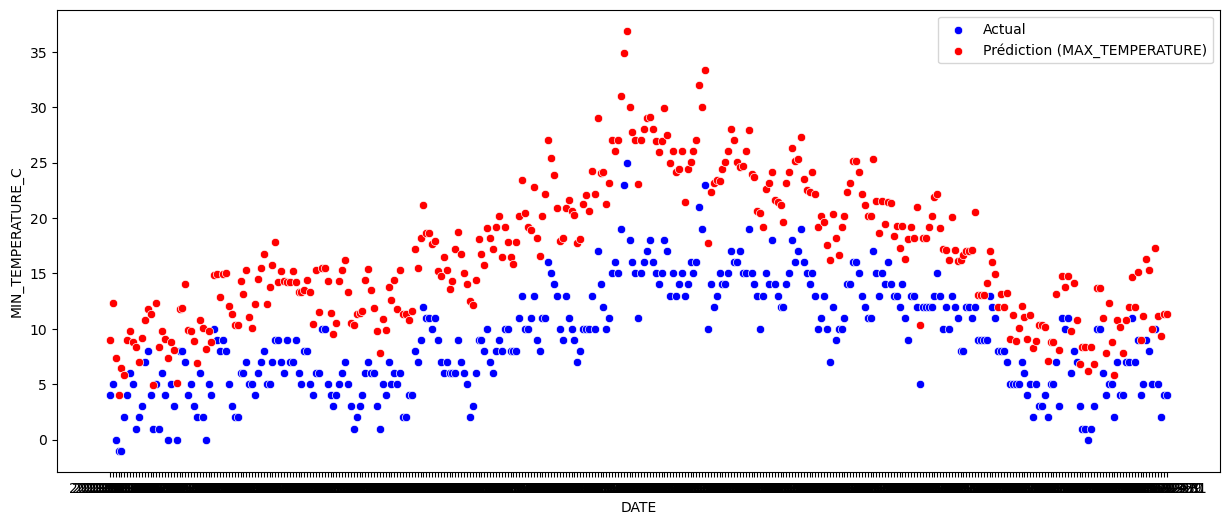

In [38]:

# Your code here :

# features = ['SUNHOUR', 'MIN_TEMPERATURE_C'] 
# modelLR.fit(df_weather[features], df_weather['MAX_TEMPERATURE_C'])
# df_weather['predict2'] = modelLR.predict(df_weather[features])

df_weather['predict2'] = modelLR.predict(df_weather[['SUNHOUR', 'MIN_TEMPERATURE_C']])


plt.figure(figsize=(15, 6))

# Create the scatterplot
sns.scatterplot(data=df_weather, x="DATE", y="MIN_TEMPERATURE_C", color='blue', label='Actual')

sns.scatterplot(data=df_weather, x="DATE", y="predict2", color='red', label='Prédiction (MAX_TEMPERATURE)')


## Scatterplot 1
- X-axis : MIN temperature
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

<Axes: xlabel='MIN_TEMPERATURE_C', ylabel='MAX_TEMPERATURE_C'>

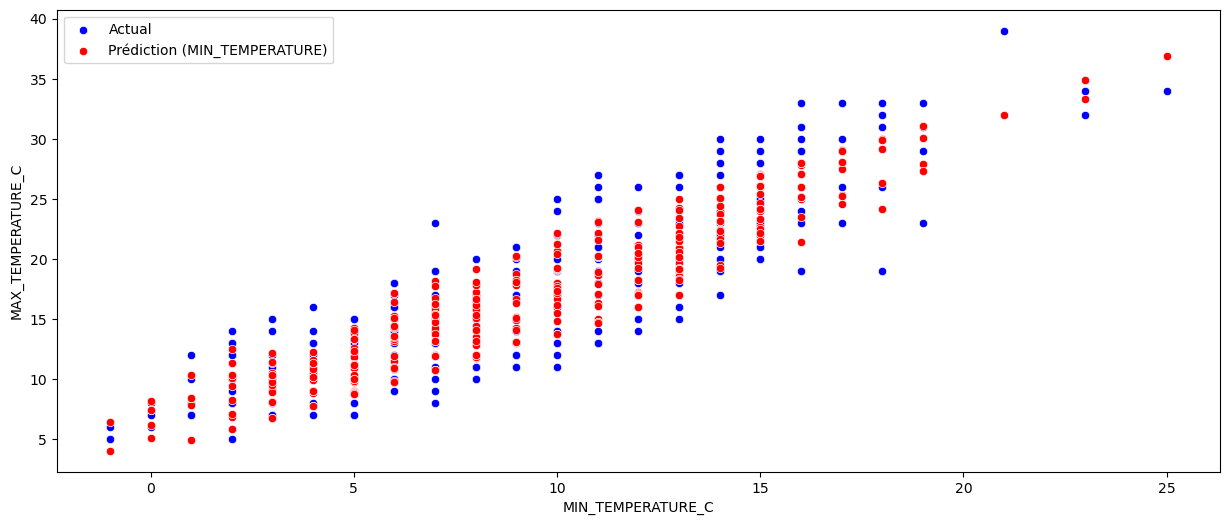

In [31]:
#Your code here :

plt.figure(figsize=(15, 6))

# Create the scatterplot
sns.scatterplot(data=df_weather, x="MIN_TEMPERATURE_C", y="MAX_TEMPERATURE_C", color='blue', label='Actual')

sns.scatterplot(data=df_weather, x="MIN_TEMPERATURE_C", y="predict2", color='red', label='Prédiction (MIN_TEMPERATURE)')

## Scatterplot 2
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

<Axes: xlabel='DATE', ylabel='MAX_TEMPERATURE_C'>

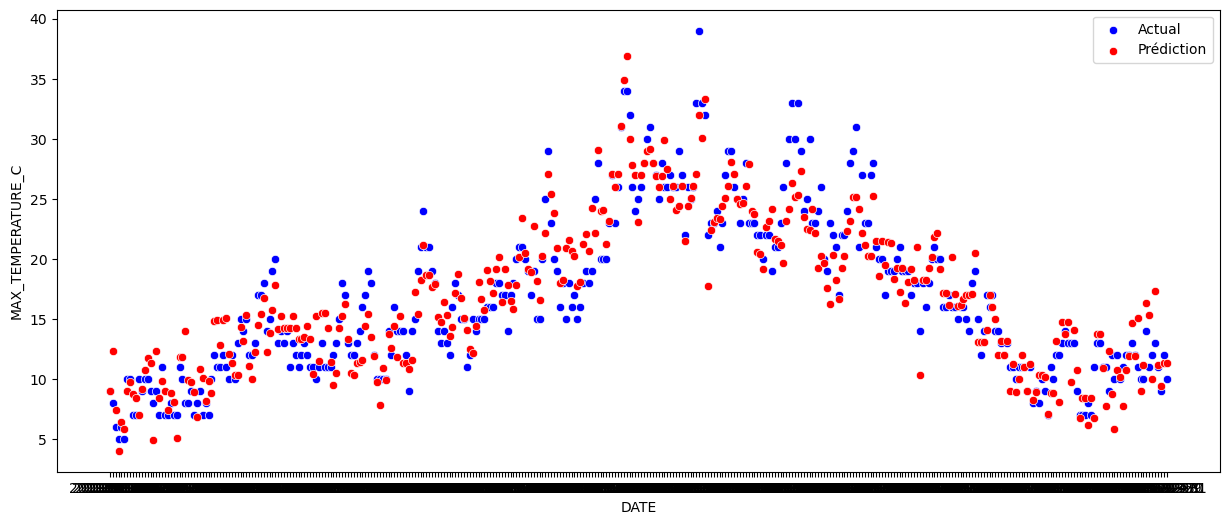

In [34]:
# Your code here :

plt.figure(figsize=(15, 6))

# Create the scatterplot
sns.scatterplot(data=df_weather, x="DATE", y="MAX_TEMPERATURE_C", color='blue', label='Actual')
sns.scatterplot(data=df_weather, x="DATE", y="predict2", color='red', label='Prédiction')